In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sympy as sp
import sys

# Subtle errors

The limited precision can cause subtle errors that are puzzling even for experienced programmers.

In [2]:
X = 1.66661
format(X, '.17f')

'1.66660999999999992'

In [2]:
a = 0.1
b = 0.10000000000000001

In [3]:
a==b

True

In [5]:
c = 3602879701896397 / 2 ** 55
2 ** 55

36028797018963968

In [6]:
a==c

True

In [7]:
b==c

True

In [8]:
format(c, '.20f')

'0.10000000000000000555'

In [9]:
0.3 == 0.1 + 0.1 + 0.1

False

In [10]:
x = 0.1
format(x, '.17f')

'0.10000000000000001'

In [11]:
round(.1 + .1 + .1, 10) == 0.3

True

Floating point arithmetic is not associative. Order is important.

In [12]:
p = (1e-20 + 1) - 1
q = 1e-20 + (1 - 1)

In [13]:
print(f"p = {p}")
print(f"q = {q}")

p = 0.0
q = 1e-20


Big numbers can lead to unexpected results.

In [7]:
x = 2**52
y = (2**56) //10
z = 2**53
print(x,y,z)

4503599627370496 7205759403792793 9007199254740992


In [15]:
x <= y

True

In [16]:
x <= z

True

In [17]:
y <= z

True

So can little numbers.

In [26]:
a = -3210.48

In [27]:
b = 2**(-41)

In [28]:
c = -7059920181484585 * b

In [40]:
a == c

True

Where are the limits?

In [44]:
sys.maxsize

9223372036854775807

In [45]:
-sys.maxsize -1

-9223372036854775808

=========================================================================================================

*Back to PDF*

=========================================================================================================

# Examples of floating point numbers

In [46]:
def f2parts(num, processor_type):
    ######################################################################
    #
    # f2parts turns a floating point number into the binary parts and their
    # decimal representations
    #
    # inputs: floating point number and processor
    #
    ######################################################################
    import bitstring # may need to install package: "!pip install bitstring"
    import pandas as pd
    
    processor = {32: 9, 64 : 12}
    p_len = processor[processor_type]
    bias = 2**(p_len - 2) - 1 # determines the bias for the processor
    
    # compute the hexadecimal value for the input
    hex_value = bitstring.BitArray(float=num, length=processor_type)
    
    # extract the binary parts
    sign_bit = hex_value[:1]
    fraction_bits = hex_value[p_len:]
    exponential_bits = hex_value[1:p_len]
    
    # convert binary to decimal form
    if exponential_bits.uint > 0:
        fract_decimal = 1. + 1.*fraction_bits.uint/2**(processor_type-p_len)
    else:
        fract_decimal = 2.*fraction_bits.uint/2**(processor_type-p_len)
    exponent = exponential_bits.uint - bias
    
    # collect the binary and decimal values and print
    binary_values = np.array([sign_bit.bin, exponential_bits.bin, fraction_bits.bin])
    decimal_values = np.array([1-sign_bit.uint*2, exponent, fract_decimal])
    display(pd.DataFrame(np.array([binary_values, decimal_values]).T, columns=['Bits', 'Decimal'], 
                               index=["Sign", "Exponent", "Fraction"]).T)

f2parts takes a floating number and its bit length (32 or 64) and shows the three parts. 

In [47]:
f2parts(10.7, 32);

,Sign,Exponent,Fraction
Bits,0,10000010,01010110011001100110011
Decimal,1.0,3.0,1.337499976158142


In [48]:
f2parts(-23445.25, 64)

,Sign,Exponent,Fraction
Bits,1,10000001101,0110111001010101000000000000000000000000000000...
Decimal,-1.0,14.0,1.4309844970703125


In [49]:
def parts2f(sign, exponent, sig):
    return ((-1)**(sign-1)*sig*2.**exponent)

In [50]:
parts2f(1, 3, 1.337499976158142)

10.699999809265137

In [51]:
10.7 - parts2f(1, 3, 1.337499976158142)

1.9073486257070726e-07

## Range and precision

In [52]:
prec32 = 2**(-24)
prec64 = 2**(-53)

f32 = [parts2f(0, -126, 1), parts2f(1, 254-127, (2.-prec32*2)), prec32, -np.log10(prec32)]
f64 = [parts2f(0, -1022, 1), parts2f(1, 2046-1023, (2.-prec64*2)), prec64, -np.log10(prec64)]

display(pd.DataFrame(np.array([f32, f64]), index=['32 bit', '64 bit'], 
                           columns=["Min", "Max", "Machine Precision", "# of Significant Digits"]))

,Min,Max,Machine Precision,# of Significant Digits
32 bit,-1.175494e-38,3.402823e+38,5.960464e-08,7.22472
64 bit,-2.225074e-308,1.797693e+308,1.110223e-16,15.95459


## Examples of floating point representations

In [53]:
f2parts(-0.0, 32);

,Sign,Exponent,Fraction
Bits,1,00000000,00000000000000000000000
Decimal,-1.0,-127.0,0.0


In [54]:
f2parts(np.NaN, 32);

,Sign,Exponent,Fraction
Bits,0,11111111,10000000000000000000000
Decimal,1.0,128.0,1.5


In [55]:
f2parts(-np.Inf, 32);

,Sign,Exponent,Fraction
Bits,1,11111111,00000000000000000000000
Decimal,-1.0,128.0,1.0


In [56]:
f2parts(-1e-45, 32);

,Sign,Exponent,Fraction
Bits,1,00000000,00000000000000000000001
Decimal,-1.0,-127.0,2.384185791015625e-07


##  Floating point computing is NOT exact

In [57]:
a = 1./3
b = a + a + 1. - 1.  # should be 2/3
c = 2*a # should be 2/3
print("b == c? {} !".format(b == c))
print("b - c = {:e}".format(b - c))

b == c? False !
b - c = -1.110223e-16


In [58]:
pd.set_option("display.max_colwidth", 80)

In [59]:
f2parts(b, 64);

,Sign,Exponent,Fraction
Bits,0,01111111110,0101010101010101010101010101010101010101010101010100
Decimal,1.0,-1.0,1.333333333333333


In [60]:
f2parts(c, 64);

,Sign,Exponent,Fraction
Bits,0,01111111110,0101010101010101010101010101010101010101010101010101
Decimal,1.0,-1.0,1.3333333333333333


## Floating point computation can't handle numbers too large or small

In [61]:
x = 1e-308
print("inverse of {:e} is {:e}".format(x, 1/x))

inverse of 1.000000e-308 is 1.000000e+308


In [62]:
x = 1e-309
print("inverse of {:e} is {:e}".format(x, 1/x))

inverse of 1.000000e-309 is inf


## Limited precision

* Small numbers (in relative sense) are lost in addition and subtraction

In [63]:
print(1. - 1e-16 == 1.)

False


In [64]:
print(1. + 1e-16 == 1.)

True


In [65]:
import math
largeint = 2**32 - 1

# here we subtract the large integer from an integer
print("Integer arithmetic:")
a = math.factorial(30) # a big number in Python 
print("a = ", a)
print("a - {:d} == a ?".format(largeint), (a - largeint) == a)

# here we subtract the large integer as a floating point number from a floating point number
print("\nFloating point arithmetic:")
b = float(math.factorial(30)) # the big number as a floating point number

# note that there is truncation of the floating point number
print("b = ", b)
print("b - {:d} == b ?".format(largeint), (b - largeint) == b)

Integer arithmetic:
a =  265252859812191058636308480000000
a - 4294967295 == a ? False

Floating point arithmetic:
b =  2.6525285981219107e+32
b - 4294967295 == b ? True


=========================================================================================================

*Back to PDF*

=========================================================================================================

# Catastrophic cancellation

Using explicit mathematical formulas may not always be the best way to compute something. Consider the following examples.

## First Example

The solution(s) to the second-order equation:
$$
x^2 - 2 p x -  q = 0
$$

Would usually be provided by:
$$
\text{solutions = } \frac{-2p \pm \sqrt {4p^2+4q} }{2}
$$
But if we program the solution for the smallest root, $r_{min}$, we get:

In [66]:
def r1(p1,q1):
    return (p1 - np.sqrt(p1**2 + q1))

p1 = 12345678
q1 = 1

print(f"Method 1 = {r1(p1,q1)}")


Method 1 = -4.0978193283081055e-08


Recognizing that $-q$ is the product of $r_{min}$ and $r_{max}$, the smaller root could also be computed as:

In [67]:
def r2(p1,q1):
    return (-(q1)/(p1 + np.sqrt(p1**2 + q1)))

p1 = 12345678
q1 = 1

print(f"Method 2 = {r2(p1,q1)}")

Method 2 = -4.0500003321000205e-08


Method 1 has almost no correct significant digits. It attempts to compute a small number by subtracting two nearly equal large numbers. Almost all correct significant digits in the input are lost during the subtraction. Method 2 however, produces an answer that is correct to full machine precision.

## Second Example

Dramatic loss of precision can happen when very similar numbers are subtracted

* Value the following function around 0: 

$$f(x) = \frac{1}{x^2}(1-\cos(x))$$

 * Mathematically: $\lim_{x\rightarrow 0}f(x) = \frac{1}{2}$

A straight forward implementation fails spectacularly for small $x$.

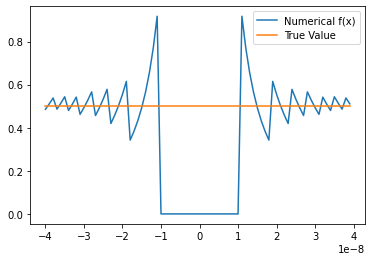

In [68]:
import numpy as np
import pandas as pd
def f(x) :
    return (1.-np.cos(x))/x**2

def g(x) :
    return (2 * np.sin(.5*x)**2)/x**2

x = np.arange(-4e-8, 4e-8, 1e-9)
df = pd.DataFrame(np.array([f(x), g(x)]).T, index=x, columns=['Numerical f(x)', 'True Value']);
df.plot(figsize=(6, 4));

### How did it happen?

In [69]:
x = 1.1e-8 # an x close to zero
print("cos({:.16e}) = {:.16f}".format(x, np.cos(x))) # cosine of that x
print("1-cos({:.0e}) = {:.16e}".format(x, 1.-np.cos(x))) # 1- cosine x
print("true value of 1-cos({:.0e}) = {:.16e}".format(x, 2*np.sin(.5*x)**2)) # true value of 1 minus that cosine

cos(1.0999999999999999e-08) = 0.9999999999999999
1-cos(1e-08) = 1.1102230246251565e-16
true value of 1-cos(1e-08) = 6.0499999999999997e-17


* Dramatic precision loss when subtracting numbers that are very similar 
 * Most leading significant digits cancel
 * The result has much fewer number of significant digits
 
 
* Catastrophic cancellation could easily happen in practice


* For example, deltas for hedging are often computed by bump and re-value
 * Very small bump sizes should be avoided

# A finance example
The Cox-Ingersoll-Ross (CIR) process is widely used in quant finance, *e.g.* in the short rate and Heston model:

$$ dr_t = \kappa(\mu - r) dt + \sigma \sqrt{r_t} dW_t
$$

the variance of $r_t$ at $t > 0$:

$$\text{Var}[r_t | r_0] = \frac{r_0\sigma^2}{\kappa}(e^{-\kappa t} - e^{-2\kappa t}) + \frac{\mu\sigma^2}{2\kappa}(1-e^{-\kappa t})^2$$

how can catastrophic cancellation arise?

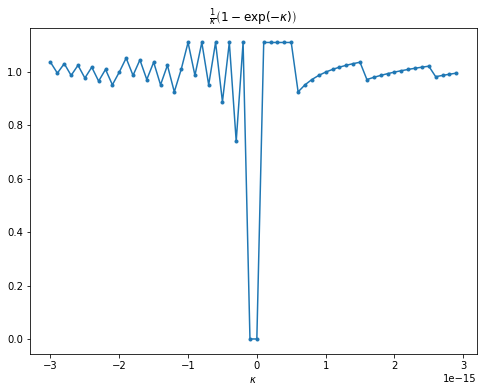

In [70]:
k = np.arange(-3e-8, 3e-8, 1e-9)*1e-7
t = 1
v = (1-np.exp(-k*t))/k
plt.figure(figsize=(8,6))
plt.plot(k, v, '.-')
plt.title(r'$\frac{1}{\kappa} \left(1-\exp(-\kappa)\right)$')
plt.xlabel(r'$\kappa$');

We can use `sympy` to evaluate what $\kappa$ should be at 0.

In [71]:
sp.init_printing(use_latex = True)

kappa = sp.symbols("k", positive = True)
expression = (1-sp.exp(-kappa))/kappa
sp.limit(expression, kappa, 0)

## Bump Size for Delta in a Derivative

How should you choose the $h$ so that the following finite difference approximation is the most accurate?

$$ f'(x) \approx \frac{1}{h}(f(x+h) - f(x)) $$

Often, the best $h$ is when truncation error equals to the rounding error:

$$ \frac{1}{2} f''(x) h^2 = f(x) \epsilon_m $$

Thus the "optimal" would be $h^* = \sqrt{\frac{2 f(x)\epsilon_m}{f''(x)}} $. 

   <p>&nbsp;</p>

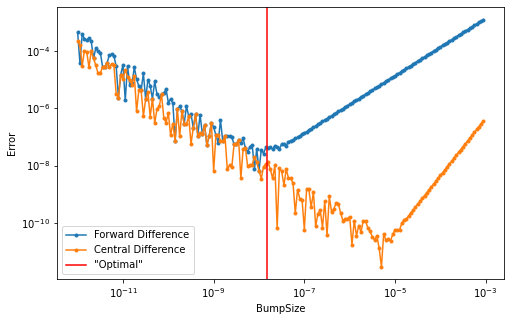

In [72]:
import numpy as np

def f(x):
    return np.exp(x)

def g(x):
    return np.exp(x)

def g2(x):
    delta = 1e-4
    return (f(x+delta) + f(x-delta) - 2*f(x))/delta/delta

x = 1.
hs = 10.**np.arange(-12., -3., .05)

fd = [(f(x+h)-f(x))/h for h in hs] # forward difference
fd2 = [.5*(f(x+h)-f(x-h))/h for h in hs] # central difference
e1 = abs(fd - g(x))
e2 = abs(fd2 - g(x))
ho = np.sqrt(2.*f(x)*prec64/g2(x))

plt.figure(figsize=(8,5))
plt.loglog(hs, e1, '.-')
plt.loglog(hs, e2, '.-')
plt.axvline(x=ho, color='r')
plt.legend(["Forward Difference", "Central Difference", '"Optimal"'])
plt.xlabel("BumpSize")
plt.ylabel("Error");

However, in this case we are better off using central difference (which is a different numerical approximation of the derivative):

$$ f'(x) \approx \frac{1}{2h}\left(f(x+h) - f(x-h)\right) $$

# Condition number
Consider the relative error of a function with multiple arguments: $f = f(x_1, ..., x_n)$:

$$
\small
df = \sum_i \frac{\partial f}{\partial x_i} dx_i \iff
\frac{df}{f} = \sum_i \frac{x_i}{f}\frac{\partial f}{\partial x_i} \frac{dx_i}{x_i}
$$

Assuming input argument's relative errors are $\epsilon_i$ (could be negative):

$$
\small
\left| \frac{\Delta f}{f} \right| = \left| \sum_i \frac{x_i}{f}\frac{\partial f}{\partial x_i} \epsilon_i \right|
\le \sum_i \left| \frac{x_i}{f}\frac{\partial f}{\partial x_i} \right| \left|\epsilon_i\right| \le \sum_i \left| \frac{x_i}{f}\frac{\partial f}{\partial x_i} \right| \epsilon_m \equiv k(f) \epsilon_m
$$

where $\epsilon_m$ is the maximum relative error of all inputs. 

* $k(f) = \sum_i \left| \frac{x_i}{f}\frac{\partial f}{\partial x_i} \right|$ is defined as the condition number of a **function**, 
* it is the maximum growth factor of the relative error.
* the calculation loses about $\log_{10}(k(f))$ decimal digits of accuracy.

 ## Well-posed and ill-posed problems
 
 Condition number is the systematic approach to detect potential numerical problems:
 
 Example 1:
 * $f(x_1, x_2) = x_1 - x_2$ 
 
   $k(f) = \frac{|x_1| + |-x_2|}{|x_1 - x_2|}$, ill conditioned when $x_1 \approx x_2$, catastrophic cancellation
   
   
   

   
Example 2:   
 * $f(x_1, x_2) = x_1 x_2$ 
 
$$ k(f) = = \sum_i \left| \frac{x_i}{f}\frac{\partial f}{\partial x_i} \right| = \frac{|x_1 x_2 + x_2 x_1|}{x_1 x_2} $$
 
therefore, $k(f) = 2$, the multiplication is well conditioned


Conclusion

The problem is ill-posed if its condition number is large.

* In practice, however, it is impossible to run condition number analysis over complicated calculations:
* We have to rely upon monitoring and testing

## Even a well-posed problem can be unstable

Consider the previous example of $f(x) = \frac{1}{x^2}(1-\cos(x))$:

$$
k(f) = \left|\, 2 + \frac{x \sin{\left (x \right )}}{\cos{\left (x \right )} - 1} \, \right|
$$

 * $k(f) \rightarrow \infty$, it is ill-posed near $x = 2\pi$ due to catastrophic cancellation.
 * $k(f) \rightarrow 0$, it is well-posed near $x = 0$.

A numerical algorithm can be unstable even if the problem itself is well-posed.
 * A better algorithm near $x=0$ is $f(x) = \frac{2}{x^2}\sin^2(\frac{x}{2})$ 
 

But an ill-posed problem is **always** numerically unstable by definition.
